In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Question 1(a): Implement Linear Discriminant Analysis

In [330]:
class LDA(object):
    def __init__(self,input_matrix):
        self.class_1 = np.ones(20)
        self.class_0 = np.zeros(20)
        self.targets = np.concatenate((self.class_0, self.class_1))
        data = np.column_stack((input_matrix, self.targets))
        self.input = np.copy(data)
    
    def get_eigenvalue_eigenvector(self,WStar):         
        return np.linalg.eig(np.array(WStar))
        
    
    
    def perform_LDA(self):
        '''Performs LDA on the given input_matrix (ground truth is last column)'''
        x = self.input[:,:-1]
        #print(len(np.unique(self.input[:,-1])))
        total_classes = len(np.unique(self.input[:,-1]))
        mean_vector = []

        for k in range(0, total_classes):
            mu_for_class = np.sum(self.input[self.input[:,-1] == k], axis = 0)/len((self.input[self.input[:,-1] == k]))
            mean_vector.append(np.delete(mu_for_class,self.input.shape[1]-1,0)) 

            
        #print(mean_vector)
        #Calculate overall mean of the data..
        overall_mean = np.sum(x, axis=0)/len(x)
        #Calculate within class covariance matrix  
        
        S_W = np.zeros((x.shape[1],x.shape[1]))
        for k in range(0, total_classes):
            xc = self.input[self.input[:,-1] == k][:,:-1]
            sc = np.zeros((x.shape[1],x.shape[1]))
            for m in range (0,xc.shape[0]):
                x_minus_mean = (xc[m] - mean_vector[k]).reshape(x.shape[1],1)
                x_minus_mean_transpose = x_minus_mean.T 
                sc += np.matmul(x_minus_mean,x_minus_mean_transpose) 
            S_W +=  sc

        #Calculating S_between
        S_B = np.zeros((x.shape[1],x.shape[1]))
        for k in range(0, total_classes):
            mean_difference = (mean_vector[k] - overall_mean).reshape(overall_mean.shape[0],1)
            mean_difference_T = mean_difference.T;
            S_B += np.matmul(mean_difference,mean_difference_T)
 

        W_star = np.matmul(np.linalg.inv(S_W),S_B)

        #Get EigenValues and EigenVectors
        eigen_values, eigen_vectors = self.get_eigenvalue_eigenvector(W_star)

        #Sorting
        indexes = eigen_values.argsort()[::-1]
        eigen_value = eigen_values[indexes]
        pcs = eigen_vectors[:,indexes]

        
        output = np.dot(x,pcs[:,0:total_classes-1])

        return mean_vector,S_W,S_B, W_star,output 

In [331]:
#importing the data
df = pd.DataFrame.from_csv("SCLC_study_output_filtered_2.csv")
data_matrix = df.as_matrix()
lda_object = LDA(data_matrix) #Handled initialization!
mean,S_within,S_between, W_star, lda_output = lda_object.perform_LDA()


Question 1(b). Compare Results with Sklearn

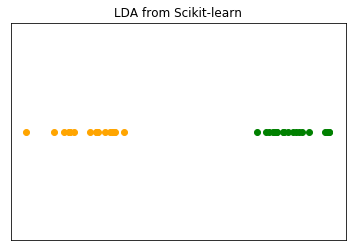

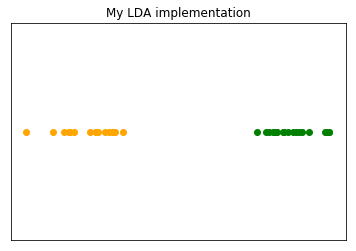

In [332]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
class_1 = np.ones(20)
class_0 = np.zeros(20)
classes = np.concatenate((class_0, class_1))
clf.fit(data_matrix,classes)


plt.figure(1)
plt.xticks([])
plt.yticks([])
lda_op = clf.transform(data_matrix)
plt.title('LDA from Scikit-learn')
plt.scatter(lda_op[0:20], [0]*20,c='orange')
plt.scatter(lda_op[20:40], [0]*20,c='green')
plt.show()

#Plotting the clusters from own LDA implementation
plt.figure(2)
plt.xticks([])
plt.yticks([])
plt.title("My LDA implementation")
plt.scatter(lda_output[0:20], [0]*20,c='orange')
plt.scatter(lda_output[20:40], [0]*20,c='green')
plt.show()



Implementation of Neural Network

In [333]:
class My_NeuralNetwork():
    def __init__(self,X,y,hidden_size):
        self.input_layer_size = len(X)
        self.output_layer_size = len(y) + 1 #for bias
        self.hidden_layer_size = hidden_size
        
        #Initialize the weights (thetas)
        self.theta_1 = np.random.uniform(0.0,1.0,(2,3))
        self.theta_2 = np.random.uniform(0.0,1.0,(2,3))
        self.a1 = X
        self.a2 = 0
        self.flag = 0
        self.flag_2 = 0
        self.a3 = 0
        self.delta_3 = 0
        self.delta_2 = 0
        self.alpha = 0.01
        self.costs = []
        self.all_theta_1 = []
        self.all_theta_2 = []
    
    def sigmoid(self,e,derivative=False):
        '''Sigmoid Activation Function'''
        if derivative == True:
            return (e * (1-e))
        return 1/(1+np.exp(-e))
    
    def forward_propogation(self):
        '''Forward propogate values through the network'''
        self.z2 = np.dot(self.theta_1,self.a1)
        self.a2 = self.sigmoid(self.z2)
        self.a2 = np.insert(arr=self.a2,values=[1],obj=0,axis=0) #Adding Bias
        self.z3 = np.dot(self.theta_2,self.a2)
        self.a3 = self.sigmoid(self.z3)   
        self.a3 = np.insert(arr=self.a3,values=[1],obj=0,axis=0) #Adding Bias)
    
    def train_neural_network(self, X, y):

        for i in range(1200):
            self.forward_propogation()
            self.delta_3 = self.a3[1:3,:] - y
            cost = (np.sum(self.delta_3**2))/2
            self.costs.append(cost)
            self.delta_2 = (np.matmul(self.theta_2.T,self.delta_3) * (self.a3 * (1-self.a3)))[1:3,:]
            big_delta_2 = np.dot(self.delta_3,self.a2.T)
            big_delta_1 = np.dot(self.delta_2, self.a1.T)
            self.theta_2 -= self.alpha*big_delta_2
            self.theta_1 -= self.alpha*big_delta_1
            self.all_theta_1.append(self.theta_1.copy())
            self.all_theta_2.append(self.theta_2.copy())


        

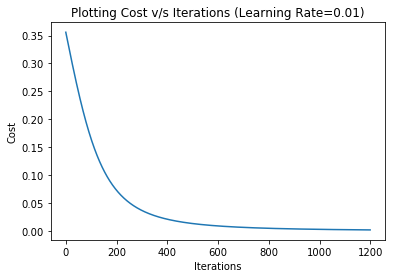

In [334]:
X = np.array([[1],[0.05],[0.1]])
y = np.array([[0.01],[0.99]])
nn = My_NeuralNetwork(X,y,2)
nn.train_neural_network(X,y)
import matplotlib.pyplot as plt
plt.plot(range(0,1200),nn.costs)
plt.title("Plotting Cost v/s Iterations (Learning Rate=0.01)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()


#Print Cost vs Iterations (x axis)

Plotting Theta_1 v/s Iterations

In [335]:
plt.figure(3)
plt.title("Plot for Theta_1")

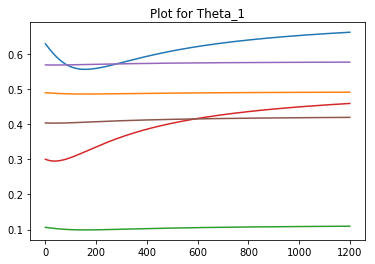

In [336]:
theta_1 = []
theta_2 = []
theta_3 = []
theta_4 = []
theta_5 = []
theta_6 = []

for k in range(0,1200):
    theta_1.append(nn.all_theta_1[k][0][0])
    theta_2.append(nn.all_theta_1[k][0][1])
    theta_3.append(nn.all_theta_1[k][0][2])
    theta_4.append(nn.all_theta_1[k][1][0])
    theta_5.append(nn.all_theta_1[k][1][1])
    theta_6.append(nn.all_theta_1[k][1][2])

plt.plot(range(0,1200),theta_1)
plt.plot(range(0,1200),theta_2)
plt.plot(range(0,1200),theta_3)
plt.plot(range(0,1200),theta_4)
plt.plot(range(0,1200),theta_5)
plt.plot(range(0,1200),theta_6)
plt.show()

Plotting All Theta_2 v/s Iterations

In [337]:
plt.figure(4)
plt.title("Plot for Theta_2 (Learning Rate = 0.01)")

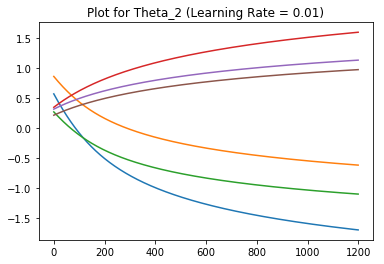

In [338]:
theta_1 = []
theta_2 = []
theta_3 = []
theta_4 = []
theta_5 = []
theta_6 = []

for k in range(0,1200):
    theta_1.append(nn.all_theta_2[k][0][0])
    theta_2.append(nn.all_theta_2[k][0][1])
    theta_3.append(nn.all_theta_2[k][0][2])
    theta_4.append(nn.all_theta_2[k][1][0])
    theta_5.append(nn.all_theta_2[k][1][1])
    theta_6.append(nn.all_theta_2[k][1][2])

plt.plot(range(0,1200),theta_1)
plt.plot(range(0,1200),theta_2)
plt.plot(range(0,1200),theta_3)
plt.plot(range(0,1200),theta_4)
plt.plot(range(0,1200),theta_5)
plt.plot(range(0,1200),theta_6)
plt.show()

THANK YOU!